In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 148s 1us/step


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.2629 - loss: 1.9724 - val_accuracy: 0.4886 - val_loss: 1.4311
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.4750 - loss: 1.4558 - val_accuracy: 0.5579 - val_loss: 1.2266
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.5399 - loss: 1.2924 - val_accuracy: 0.6026 - val_loss: 1.1153
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.5914 - loss: 1.1577 - val_accuracy: 0.6298 - val_loss: 1.0526
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6271 - loss: 1.0788 - val_accuracy: 0.6523 - val_loss: 0.9797
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6566 - loss: 0.9907 - val_accuracy: 0.6639 - val_loss: 0.9506
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.6770 - loss: 0.9254 - val_accuracy: 0.6931 - val_loss: 0.8829
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.6995 - loss: 0.8714 - 

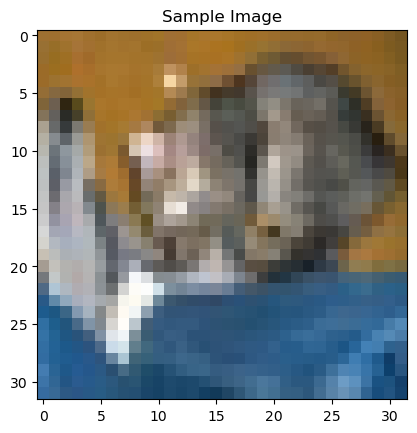

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Predicted Class : cat


In [5]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0    # Normalize pixel values to 0-1
x_test = x_test.astype('float32') / 255.0      # Normalize pixel values to 0-1
y_train = to_categorical(y_train, 10)          # One-hot encode labels
y_test = to_categorical(y_test, 10)            # One-hot encode labels

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),   # Convolutional Layer
    MaxPooling2D((2, 2)),                                                 # MaxPooling layer
    Conv2D(64, (3, 3), activation = 'relu'),                              # Second Convolutional layer
    MaxPooling2D((2, 2)),                                                 # Second MaxPooling layer
    Conv2D(128, (3, 3), activation = 'relu'),                             # Third Convolutional layer
    Flatten(),                                                            # Flatten layer
    Dense(128, activation = 'relu'),                                      # Fully connected layer
    Dropout(0.5),                                                         # Dropout for regularization
    Dense(10, activation = 'softmax')                                     # output layer (10 classes)
])

# Compile the model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Train the Model
model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.2)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)
print(f"Test Accuracy : {test_accuracy:.2f}")

# Predict on a sample image
import numpy as np
import matplotlib.pyplot as plt

# Choose a sample image from the test set
sample_image = x_test[0]
plt.imshow(sample_image)   # Display the Image    
plt.title("Sample Image")
plt.show()

# Make a Prediction
prediction = model.predict(np.expand_dims(sample_image, axis = 0))
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_class = classes[np.argmax(prediction)]
print(f"Predicted Class : {predicted_class}")
    

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.2653 - loss: 1.9487 - val_accuracy: 0.5013 - val_loss: 1.3843
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.4754 - loss: 1.4443 - val_accuracy: 0.5636 - val_loss: 1.2221
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.5595 - loss: 1.2424 - val_accuracy: 0.6111 - val_loss: 1.0934
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.6072 - loss: 1.1263 - val_accuracy: 0.6485 - val_loss: 0.9940
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6458 - loss: 1.0218 - val_accuracy: 0.6581 - val_loss: 0.9646
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.6718 - loss: 0.9421 - val_accuracy: 0.6796 - val_loss: 0.9137
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.6885 - loss: 0.9024 - val_accuracy: 0.6781 - val_loss: 0.9229
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.7106 - loss: 0.8345 - 

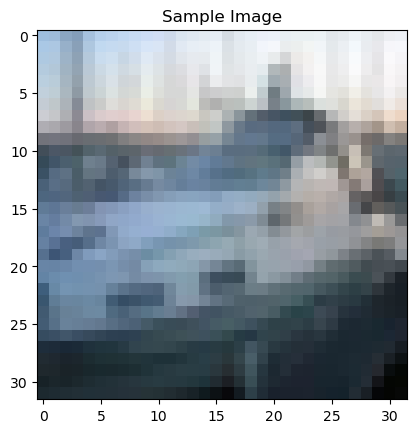

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted Class : ship


In [7]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0    # Normalize pixel values to 0-1
x_test = x_test.astype('float32') / 255.0      # Normalize pixel values to 0-1
y_train = to_categorical(y_train, 10)          # One-hot encode labels
y_test = to_categorical(y_test, 10)            # One-hot encode labels

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),   # Convolutional Layer
    MaxPooling2D((2, 2)),                                                 # MaxPooling layer
    Conv2D(64, (3, 3), activation = 'relu'),                              # Second Convolutional layer
    MaxPooling2D((2, 2)),                                                 # Second MaxPooling layer
    Conv2D(128, (3, 3), activation = 'relu'),                             # Third Convolutional layer
    Flatten(),                                                            # Flatten layer
    Dense(128, activation = 'relu'),                                      # Fully connected layer
    Dropout(0.5),                                                         # Dropout for regularization
    Dense(10, activation = 'softmax')                                     # output layer (10 classes)
])

# Compile the model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Train the Model
model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.2)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)
print(f"Test Accuracy : {test_accuracy:.2f}")

# Predict on a sample image
import numpy as np
import matplotlib.pyplot as plt

# Choose a sample image from the test set
sample_image = x_test[2]
plt.imshow(sample_image)   # Display the Image    
plt.title("Sample Image")
plt.show()

# Make a Prediction
prediction = model.predict(np.expand_dims(sample_image, axis = 0))
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_class = classes[np.argmax(prediction)]
print(f"Predicted Class : {predicted_class}")


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.2786 - loss: 1.9188 - val_accuracy: 0.4865 - val_loss: 1.4123
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.4921 - loss: 1.4195 - val_accuracy: 0.5779 - val_loss: 1.1937
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.5636 - loss: 1.2353 - val_accuracy: 0.6242 - val_loss: 1.0639
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6149 - loss: 1.0994 - val_accuracy: 0.6427 - val_loss: 1.0290
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.6435 - loss: 1.0234 - val_accuracy: 0.6797 - val_loss: 0.9198
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.6789 - loss: 0.9292 - val_accuracy: 0.6908 - val_loss: 0.8842
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.6974 - loss: 0.8675 - val_accuracy: 0.7010 - val_loss: 0.8598
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.7143 - loss: 0.8169 - 

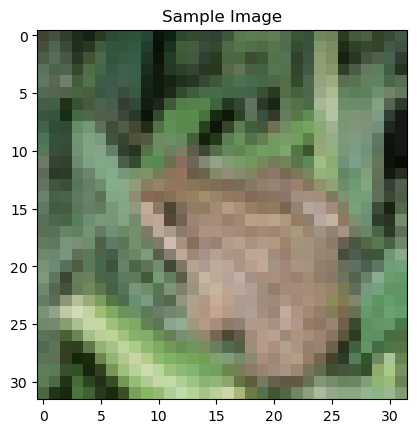

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Predicted Class : frog


In [9]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0    # Normalize pixel values to 0-1
x_test = x_test.astype('float32') / 255.0      # Normalize pixel values to 0-1
y_train = to_categorical(y_train, 10)          # One-hot encode labels
y_test = to_categorical(y_test, 10)            # One-hot encode labels

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),   # Convolutional Layer
    MaxPooling2D((2, 2)),                                                 # MaxPooling layer
    Conv2D(64, (3, 3), activation = 'relu'),                              # Second Convolutional layer
    MaxPooling2D((2, 2)),                                                 # Second MaxPooling layer
    Conv2D(128, (3, 3), activation = 'relu'),                             # Third Convolutional layer
    Flatten(),                                                            # Flatten layer
    Dense(128, activation = 'relu'),                                      # Fully connected layer
    Dropout(0.5),                                                         # Dropout for regularization
    Dense(10, activation = 'softmax')                                     # output layer (10 classes)
])

# Compile the model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Train the Model
model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.2)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)
print(f"Test Accuracy : {test_accuracy:.2f}")

# Predict on a sample image
import numpy as np
import matplotlib.pyplot as plt

# Choose a sample image from the test set
sample_image = x_test[4]
plt.imshow(sample_image)   # Display the Image    
plt.title("Sample Image")
plt.show()

# Make a Prediction
prediction = model.predict(np.expand_dims(sample_image, axis = 0))
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_class = classes[np.argmax(prediction)]
print(f"Predicted Class : {predicted_class}")
